In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# 1. Import Data

In [4]:
taxi_df = pd.read_csv(r'C:\Users\Hatice Aydoğmuş\Desktop\Python works\yellow_tripdata_2019-01.csv')

In [8]:
taxi_jan_19 = taxi_df

In [9]:
taxi_jan_19.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,NaN
1,1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,NaN
2,2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,NaN
4,4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,NaN


In [10]:
print(taxi_jan_19.shape)

(7696617, 20)


In [16]:
taxi_data = pd.concat([taxi_jan_19]) # other months can be added in the future

# 2. Data Exploration

In [17]:
taxi_data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [18]:
# assessing attributes by looking data dictionary, then selecting useful columns for the project
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID',
             'DOLocationID','payment_type','total_amount']]

In [19]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

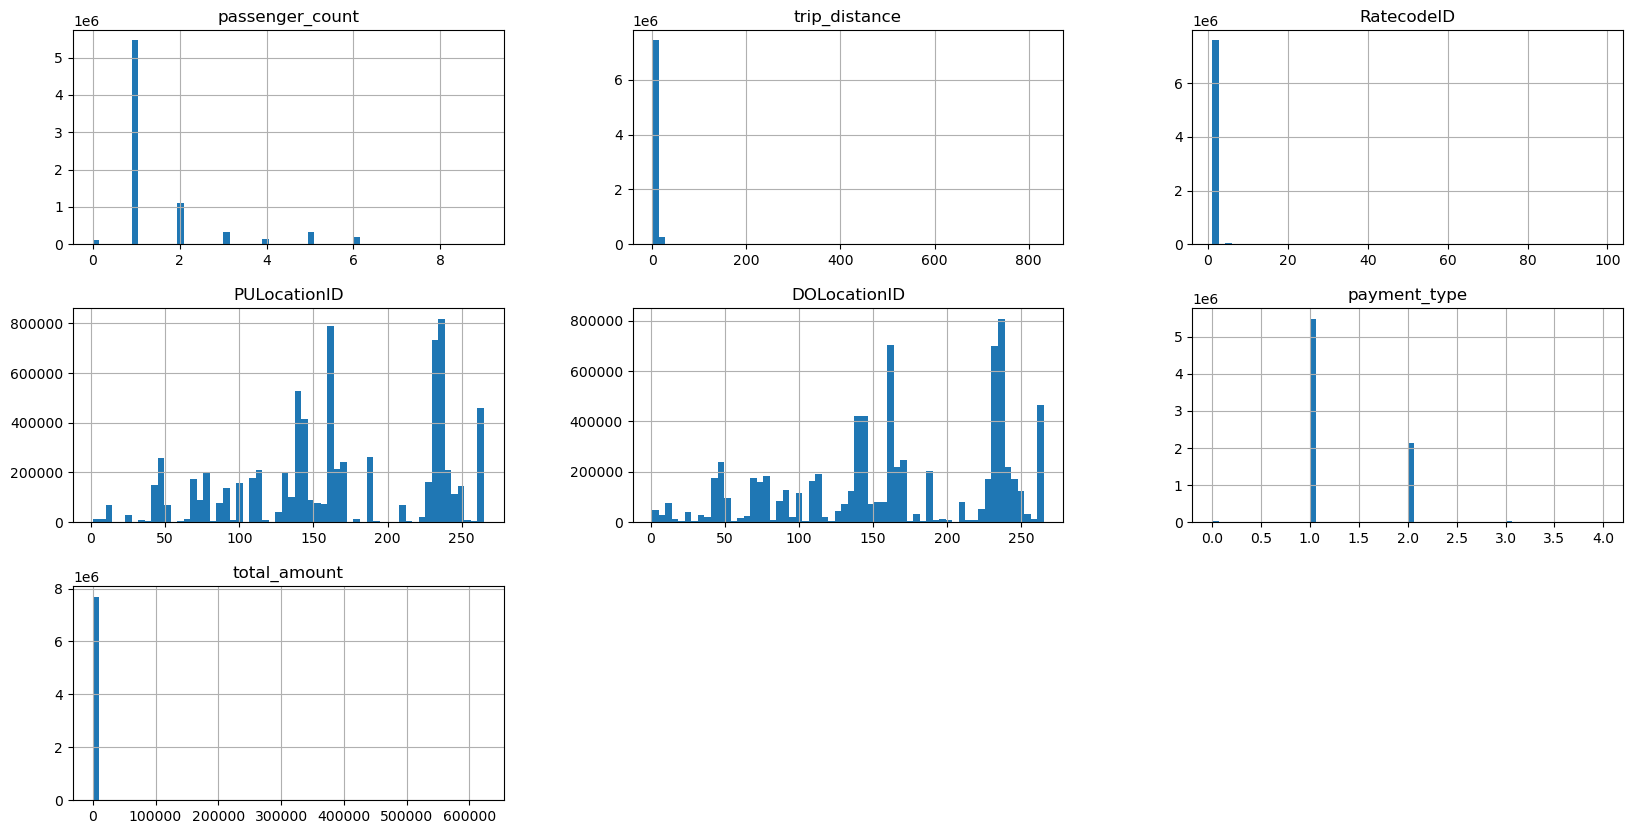

In [20]:
# Exploring with Histograms
taxi_data.hist(figsize=(20,10),bins=60)

In [21]:
taxi_data['RatecodeID'].value_counts()

1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: RatecodeID, dtype: int64

In [34]:
print(taxi_data.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2019-01-01 00:46:40   2019-01-01 00:53:20              1.0            1.5   
1  2019-01-01 00:59:47   2019-01-01 01:18:59              1.0            2.6   
2  2018-12-21 13:48:30   2018-12-21 13:52:40              3.0            0.0   
3  2018-11-28 15:52:25   2018-11-28 15:55:45              5.0            0.0   
4  2018-11-28 15:56:57   2018-11-28 15:58:33              5.0            0.0   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  
0         1.0           151           239             1          9.95  
1         1.0           239           246             1         16.30  
2         1.0           236           236             1          5.80  
3         1.0           193           193             2          7.55  
4         2.0           193           193             2         55.55  


KeyError: 'index'

<Figure size 1000x500 with 0 Axes>

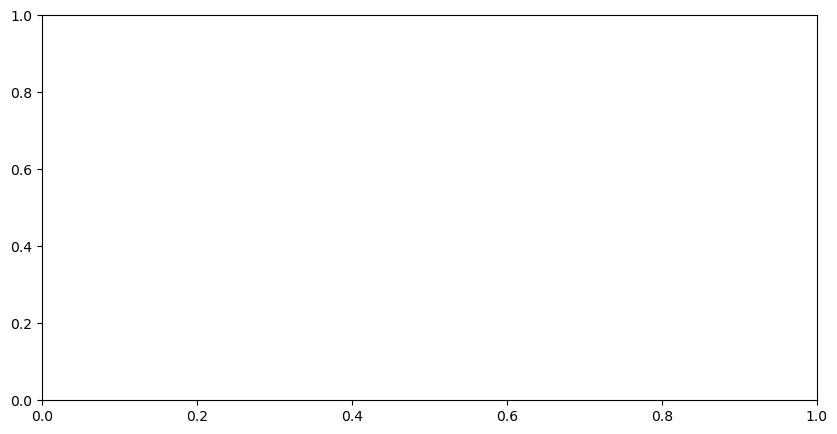

In [36]:
plt.figure(figsize=(10, 5))
taxi_data.plot(kind='scatter', x='index', y='total_amount', figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Total Amount')
plt.title('Scatter Plot of Total Amount vs Index')
plt.show()